### Problem Statement: 

A company manufacturs two products: X and Y. To manufacture each product, it has to go through three machineries: A, B, and C. Manufacturing X requires 3 hours in machine A, 9 hours in machine B and 2 hours in machine C. Similarly, manufacturing product Y requires 2, 4 and 10 hours of machines A, B and C respectively. The availability of each of the machines A, B and C during a manufacturing period are 66, 180 and 200 hours respectively. The profit per product X is USD 90 and that per product Y is USD 75. How many units of X and Y should be produced during a production period in order to maximize profit?

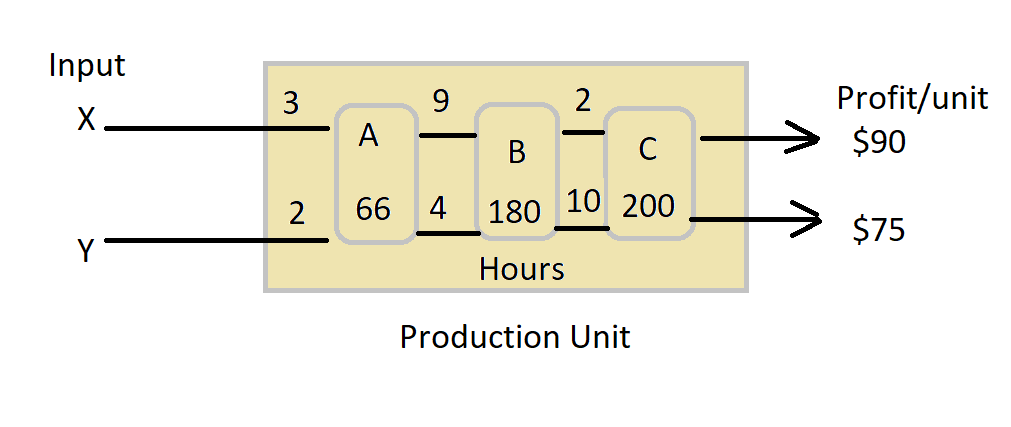

Let optimal number of products X and Y to be produced be x and y respectively.

Profit = 90x + 75y

Objective: maximime 90x + 75y subject to

Constraints:
3x + 2y <= 66;
9x + 4y <= 180;
2x + 10y <= 200;
x, y >=0

In [1]:
from pyomo.environ import *

model = ConcreteModel()

#Define variables x and y
model.x = Var (domain = NonNegativeReals)
model.y = Var (domain = NonNegativeReals)

#Define objectives
model.obj = Objective (expr = 90 * model.x + 75 * model.y, sense = maximize)

#Define Constraints
model.cons1 = Constraint (expr = 3 * model.x + 2 * model.y <= 66)
model.cons2 = Constraint (expr = 9 * model.x + 4 * model.y <= 180)
model.cons3 = Constraint (expr = 2 * model.x + 10 * model.y <= 200)

In [2]:
solver = SolverFactory("glpk")
#solver = SolverFactory("ipopt")

results = solver.solve(model)
print (results)


Problem: 
- Name: unknown
  Lower bound: 2250.0
  Upper bound: 2250.0
  Number of objectives: 1
  Number of constraints: 4
  Number of variables: 3
  Number of nonzeros: 7
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.016978979110717773
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [3]:
print ("Optimal number of products X: ", value(model.x))
print ("Optimal number of products Y: ", value(model.y))
print ("Maximum profit of the company: ", value(model.obj))

Optimal number of products X:  10.0
Optimal number of products Y:  18.0
Maximum profit of the company:  2250.0


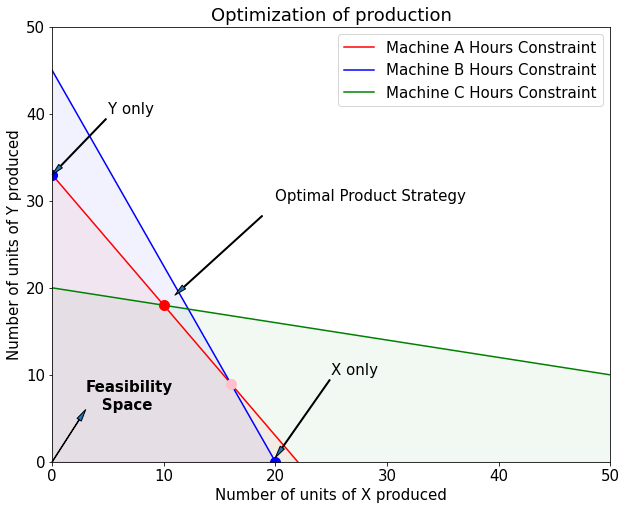

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (10,8))
plt.rcParams["font.size"] = 15
plt.axis([0, 50, 0, 50])


#Hours constraint of machine A
x = np.array([0,50])
y = 33 - 1.5*x
plt.plot(x, y, "red", label = "Machine A Hours Constraint")
plt.fill_between([0, 22], [33,0], color = "red", alpha = 0.05)


#Hours constraint of machine B
x = np.array([0, 50])
y = 45 - 2.25*x
plt.plot(x, y, "blue", label = "Machine B Hours Constraint")
plt.fill_between([0, 20], [45,0], color = "blue", alpha = 0.05)


#Hours Constraint of Machine C
x = np.array([0, 50])
y = 20 - 0.2*x
plt.plot(x, y, "green", label = "Machine C Hours Constraint")
plt.fill_between([0, 100], [20,0], color = "green", alpha = 0.05)


plt.plot(10,18, marker = "o", color = "red", markersize= 10)
plt.annotate("Optimal Product Strategy", xy = (10,18), xytext = (20,30),
            arrowprops = dict(shrink =.1, width = 1,headwidth = 5))


plt.plot(16,9, marker = "o", color = "pink", markersize= 10)

plt.plot(20, 0, marker = "o", color = "b",markersize = 10)
plt.annotate("X only", xy = (20,0.5), xytext= (25,10), arrowprops = dict(width = 1, headwidth = 5))

plt.plot(0,33,marker = "o", color = "blue", markersize = 10)
plt.annotate("Y only", xy = (0,33), xytext = (5,40), arrowprops = dict(width = 1,headwidth = 5))


plt.text(3, 6, "Feasibility\n   Space", fontdict = {"weight":"bold"})
plt.annotate("",
            xy = (3,6),
            xytext = (0,0),
            arrowprops = dict( width = 0.5, headwidth = 5))


plt.xlabel("Number of units of X produced")
plt.ylabel("Number of units of Y produced")
plt.title("Optimization of production")
plt.legend()

plt.savefig("Plot using Python.png", dpi = 300)
plt.show()